# 
Mahendra Nandi \
[BDA,RKMVERI-2020](http://cs.rkmvu.ac.in/)

# Question_2

Consider a $2000\times2000$ image I, where all pixels in the left half (first 1000 columns) are white and those in the right half (last 1000 columns) are black. A new image ($I_{new}$) of the same size is formed from I by shuffling the pixel locations. Let $D$ denotes the Euclidean distance between I and $I_{new}$. What is the total number of possible $I_{new}$ images? What is the average of $D$ across all these possible $I_{new}$ images? Explain your answer. *
----------------


In [43]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.18 s (started: 2021-07-21 00:39:13 +05:30)


In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

time: 1.51 ms (started: 2021-07-21 00:39:17 +05:30)


## Index value generated For a 4X4 Matrix

In [45]:
mat1=np.ones((4,2),dtype=np.int)
mat1

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

time: 3.04 ms (started: 2021-07-21 00:39:18 +05:30)


In [46]:
mat2=np.zeros((4,2),dtype=np.int)
mat2

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

time: 2.87 ms (started: 2021-07-21 00:39:18 +05:30)


In [47]:
mat = np.concatenate((mat1,mat2),axis=1)

time: 543 µs (started: 2021-07-21 00:39:18 +05:30)


In [48]:
mat

array([[1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0]])

time: 2.04 ms (started: 2021-07-21 00:39:18 +05:30)


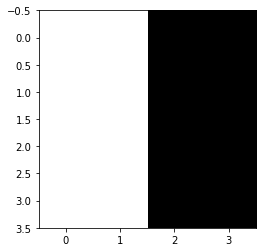

time: 72.4 ms (started: 2021-07-21 00:39:18 +05:30)


In [49]:
plt.imshow(mat,cmap="gray")

In [50]:
mat.shape

(4, 4)

time: 1.87 ms (started: 2021-07-21 00:39:19 +05:30)


In [51]:
A=[]
for i in range(4):
    for j in range(4):
        A.append([i,j])
A        

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3]]

time: 3.35 ms (started: 2021-07-21 00:39:19 +05:30)


In [52]:
# B=[]
# for i in range (len(A)):
#     for j in range(i+1,len(A)):
#         B.append([A[i][0],A[i][1],A[j][0],A[j][1]])

# #len(B)
# B

time: 190 µs (started: 2021-07-21 00:39:19 +05:30)


### Distance Vector Generated

## Functional Representation

In [53]:
def Distance_Generation(image_height,image_width):
    """
    image_height: Height of the image
    image_width: Width of the image
    """
    Dist=[]
    r=image_height*image_width
    m=np.int(r/2+1)
    for i in range(m):
        Dist.append(np.sqrt(i*2))
    return Dist

time: 500 µs (started: 2021-07-21 00:39:20 +05:30)


### Number Of Candidate Points 

In [54]:
def Candidate_Points(image_height,image_width):
    """
    image_height: Height of the image
    image_width: Width of the image
    """
    r=image_height*image_width
    Candidates=[]
    m=np.int(r/2+1)
    for i in range(m):
        Candidates.append((math.comb(np.int(r/2),i))**2)
    return Candidates

time: 526 µs (started: 2021-07-21 00:39:20 +05:30)


## Average Euclidean Distance

In [55]:
def avg_euclidean_dist(image_height,image_width):
    """
    image_height: Height of the image
    image_width: Width of the image
    """
    dist=Distance_Generation(image_height,image_width)
    cand=Candidate_Points(image_height,image_width)
    k=list(np.array(dist)*np.array(cand))
    total=(math.factorial(image_height*image_width)/np.square(math.factorial((image_height*image_width)/2)))
    return sum(k)/total

time: 530 µs (started: 2021-07-21 00:39:20 +05:30)


In [56]:
avg_euclidean_dist(4,4)

2.803079012737049

time: 1.91 ms (started: 2021-07-21 00:39:20 +05:30)


In [57]:
Distance_Generation(4,4)

[0.0,
 1.4142135623730951,
 2.0,
 2.449489742783178,
 2.8284271247461903,
 3.1622776601683795,
 3.4641016151377544,
 3.7416573867739413,
 4.0]

time: 2.15 ms (started: 2021-07-21 00:39:21 +05:30)


# in one function 

$ $


Initially I have put the following example for easy understand, taking an image of 2x2 and showing the algorithm. and at the last porting I explained the ${(^{n^2 /2}C_i)}^2$ term as well with taking another example of 4x4 image.
<img src="solution.jpeg">

So, in general for an image nxn where n is even, the problem reduced to:


$$\Bigg[ \frac{sum([ \ 0,\sqrt{2},\sqrt{4},\sqrt{6},..,\sqrt{n^2} \ ]*[(^{n^2/2}C_0)^2,(^{n^2/2}C_1)^2,(^{n^2/2}C_2)^2,(^{n^2/2}C_3)^2,..,(^{n^2/2}C_{^{n^2/2}} ] )}  {\frac{(n^2!)} {(n^2/2!)(n^2/2!)}}  \Bigg]$$ (* denotes point wise multiplication of those two lists)


 $$= \displaystyle \Bigg[\frac{\sum \limits _{i=0} ^{n^2/2} (^{n^2/2}C_i)^2 \sqrt{2i}}   {\sum \limits _{i=0} ^{n^2/2} (^{n^2/2}C_i)^2}\Bigg]$$

In [58]:
import numpy as np
import math

# we are using here images with same height and width. So, here image_dimension = n if image is of nxn dims.
# Distances is a list of Euclidean distances of every 'I_new' vectors from 'I' vector.
# Candidates is another list containing the no of vectors having same distance (accordance with the list 'Distances')
#      so, the length of these two lists are same.
def get_average_distance(image_dimension):
    
    Distances=[]
    Candidates=[]
    no_of_pixels=image_dimension*image_dimension
    m=np.int((no_of_pixels/2) + 1)
    for i in range(m):
        Distances.append(np.sqrt(i*2))
#     print("Distances = {}".format(Distances))
    for i in range(m):
        Candidates.append((math.comb(np.int(no_of_pixels/2),i))**2)
#     print("\nCandidates = {}".format(Candidates))
    total_distances=list(np.array(Distances)*np.array(Candidates))
#     print("\ntotal_distances = {}".format(total_distances))
    no_of_total_vector=int(math.factorial(no_of_pixels)/np.square(math.factorial((no_of_pixels)/2)))
#     print("\n\nno_of_total_vector = {}".format(sum(Candidates)))
    if no_of_total_vector == sum(Candidates):
        print("\n\nYou have done correct calculation.\nThe total no of possible image vector after shuffle is : {}".format(int(sum(Candidates))))
    return print("\n\nThe average Euclidean distance of 'I_new' from 'I' is : {:.3f}".format(sum(total_distances)/sum(Candidates)))

time: 821 µs (started: 2021-07-21 00:39:21 +05:30)


In [59]:
get_average_distance(2)



You have done correct calculation.
The total no of possible image vector after shuffle is : 6


The average Euclidean distance of 'I_new' from 'I' is : 1.276
time: 595 µs (started: 2021-07-21 00:39:22 +05:30)


In [60]:
get_average_distance(4)



You have done correct calculation.
The total no of possible image vector after shuffle is : 12870


The average Euclidean distance of 'I_new' from 'I' is : 2.803
time: 551 µs (started: 2021-07-21 00:39:22 +05:30)


In [61]:
get_average_distance(6)



The average Euclidean distance of 'I_new' from 'I' is : 4.227
time: 575 µs (started: 2021-07-21 00:39:22 +05:30)


In [62]:
get_average_distance(8)



The average Euclidean distance of 'I_new' from 'I' is : 5.645
time: 903 µs (started: 2021-07-21 00:39:22 +05:30)


In [63]:
get_average_distance(32)



The average Euclidean distance of 'I_new' from 'I' is : 22.625
time: 14.3 ms (started: 2021-07-21 00:39:23 +05:30)


In [64]:
# another short function 

time: 147 µs (started: 2021-07-21 00:39:23 +05:30)


In [65]:
import numpy as np
import math

# we are using here images with same height and width. So, here image_dimension = n if image is of nxn dims.
# Total_vectors is a list of no of vectors having same Euclidean distances from 'I' vector.
# Total_distances is another list containing the total distance for group of vectors having same distance (accordance with the list 'Distances')
#      so, the length of these two lists are same.
def get_average_distance(image_dimension):
    no_of_pixels=int(image_dimension*image_dimension)
    m=np.int((no_of_pixels/2) + 1)
    Total_distances=[]
    Total_vectors=[]
    for i in range(m):
        Total_distances.append(round(((math.comb(np.int(no_of_pixels/2),i))**2) * (np.sqrt(2*i)) ,3))
        Total_vectors.append(((math.comb(np.int(no_of_pixels/2),i))**2))
    return round(sum(Total_distances)/sum(Total_vectors),3)

# here we can calculate for an image of maximum dimension 32x32 , above that we have to go for approximation for values otherwise

time: 836 µs (started: 2021-07-21 00:39:23 +05:30)


In [66]:
get_average_distance(32)

22.625

time: 30.8 ms (started: 2021-07-21 00:39:23 +05:30)


In [67]:
get_average_distance(34)

<ipython-input-65-c30385329cee>:14: RuntimeWarning: overflow encountered in multiply
  Total_distances.append(round(((math.comb(np.int(no_of_pixels/2),i))**2) * (np.sqrt(2*i)) ,3))


OverflowError: int too large to convert to float

time: 18.8 ms (started: 2021-07-21 00:39:24 +05:30)


# Another problem not related to the above question

A number spiral is an infinite grid whose upper-left square has number 1. Here are the first five layers of the spiral:
<img src="image.png">
Your task is to find out the number in row y and column x.
---------


In [68]:
x=5
y=2
    
if x%2==0:
    if y<x:
        value=(x**2)-(y-1)
    else:
        if y%2==0:
            value= ((y-1)**2)+x
        else:
            value= (y**2)-(x-1)
else:
    if y<x:
        value=((x-1)**2)+y
    else:
        if y%2==0:
            value= ((y-1)**2)+x
        else:
            value= (y**2)-(x-1)
value

18

time: 2.92 ms (started: 2021-07-21 00:39:25 +05:30)


In [39]:
# ANother approach
x=5
y=2
# for i in range(x):
#     for j in range(y):
       
def get_value(x,y):    
    if x<y:
        if y%2==0:
            value= ((y-1)**2)+x
        else:
            value= (y**2)-(x-1)
    else:
        if x%2==0:
            value=(x**2)-(y-1)
        else:
            value=((x-1)**2)+y
    return value

In [42]:

get_value(3,5)

23

time: 1.9 ms (started: 2021-07-21 00:37:41 +05:30)


# Date 23/10/2021

# Question


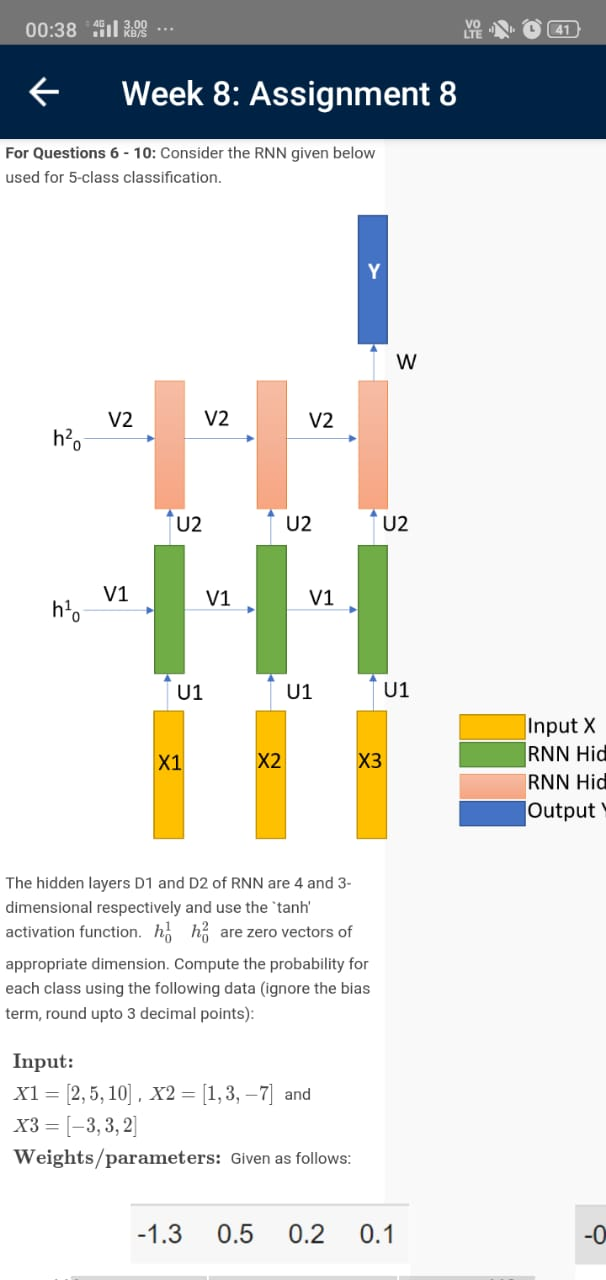

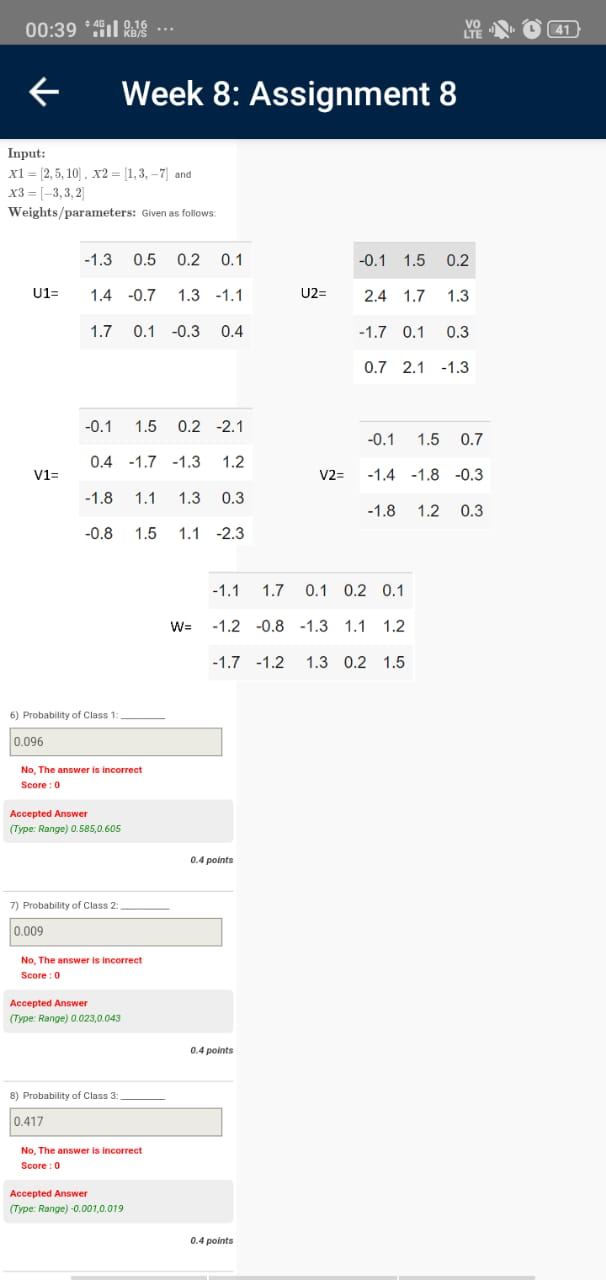


In [4]:
import numpy as np

In [5]:
def activation(row_mat):
    activation_value=[]
    for i in row_mat.tolist()[0]:
        activation_value.append(np.tanh(i))
    return activation_value

In [6]:
def softmax(vector):  ## if the input is vector
    softmax=[]
    s=np.sum([np.exp(i) for i in vector])  
#     print([np.exp(i) for i in vector.tolist()[0]],s)
    for i in vector:
        softmax.append(np.round(np.exp(i)/s,8))
    return softmax

def softmax1(row_mat):  ## if the input is matrix , i.e, without activation function
    softmax=[]
    s=np.sum([np.exp(i) for i in row_mat.tolist()[0]])  
#     print([np.exp(i) for i in row_mat.tolist()[0]],s)
    for i in row_mat.tolist()[0]:
        softmax.append(np.round(np.exp(i)/s,8))
    return softmax

In [7]:
def get_probability(row_mat):  ## by this definition probability may cvome negative, so you should not use this
    probability=[]
    s=np.sum(row_mat.tolist()[0])
    for i in row_mat.tolist()[0]:
        probability.append(np.round(i/s,3))
    return probability
        

In [8]:
sum(softmax(np.matrix([0,0.5,1,2,5,10])))

array([[4.5070000e-05, 7.4310000e-05, 1.2251000e-04, 3.3303000e-04,
        6.6890000e-03, 9.9273608e-01]])

In [9]:
x1=[2,5,10]
x2=[1,3,7]
x3=[-3,3,2]

u1=np.matrix([[-1.3,0.5,0.2,0.1], [1.4,-0.7,1.3,-1.1],[1.7,0.1,-0.3,0.4]])
u2=np.matrix([[0.1,1.5,0.2], [2.4,1.7,1.3],[-1.7,0.1,0.3],[0.7,2.1,-1.3]])

v1=np.matrix([[-0.1,1.5,0.2,-2.1], [0.4,-1.7,-1.3,1.2],[-1.8,1.1,1.3,0.3],[-0.8,1.5,1.1,-2.3]])
v2=np.matrix([[-0.1,1.5,0.7], [-1.4,-1.8,-0.3],[-1.8,1.2,0.3]])

w=np.matrix([[-1.1,1.7,0.1,0.2,0.1],[-1.2,-0.8,-1.3,1.1,1.2],[-1.7,-1.2,1.3,0.2,1.5]])

In [10]:
g1=activation(np.dot(x1,u1))
g2=activation(np.dot(g1,v1) + np.dot(x2,u1))
g3=activation(np.dot(g2,v1) + np.dot(x3,u1))

r1=activation(np.dot(g1,u2))
r2=activation(np.dot(g2,u2)+np.dot(r1,v2))
r3=activation(np.dot(g3,u2)+np.dot(r2,v2))

y=activation(np.dot(r3,w))  ## this is a vector

Y=np.dot(r3,w)  ## this is a matrix

In [11]:
softmax=softmax(y)
softmax

[0.33840098, 0.06006832, 0.40392311, 0.06995067, 0.12765692]

In [12]:
## this is the correct one, if in the last layer there is no activation funtion

softmax=softmax1(Y)  # for the matrix   
softmax

[0.25302311, 0.0149196, 0.62961656, 0.02996174, 0.07247899]

In [ ]:
## though the answer is not mathching this is the way to solve these types of questions

In [4]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:

#!pip install art
from art import tprint, aprint
tprint('See you on next videos!')
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)
subscribe()

You should consider upgrading via the '/home/sysadm/anaconda3/bin/python -m pip install --upgrade pip' command.
 ____                                                                        _            _      _                    _ 
/ ___|   ___   ___   _   _   ___   _   _    ___   _ __    _ __    ___ __  __| |_  __   __(_)  __| |  ___   ___   ___ | |
\___ \  / _ \ / _ \ | | | | / _ \ | | | |  / _ \ | '_ \  | '_ \  / _ \\ \/ /| __| \ \ / /| | / _` | / _ \ / _ \ / __|| |
 ___) ||  __/|  __/ | |_| || (_) || |_| | | (_) || | | | | | | ||  __/ >  < | |_   \ V / | || (_| ||  __/| (_) |\__ \|_|
|____/  \___| \___|  \__, | \___/  \__,_|  \___/ |_| |_| |_| |_| \___|/_/\_\ \__|   \_/  |_| \__,_| \___| \___/ |___/(_)
                     |___/                                                                                              

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 

	Like and subscribe to support this work!

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 


# Use of strip( ) , rstrip( ) with reading and writting file.

use of dictionary.setdefault() function

AAA x 111\
AAB x 111\
AAA x 112\
AAC x 123\
you have to print this like-\
{'AAA': ['111', '112'], 'AAB': ['111'], 'AAC': ['123']}

In [64]:
d = {}
with open("./filename.txt", "r") as file:
    line = file.readline().rstrip()
    while line:
        lst = line.split() # Split into sequence like ['AAA', 'x', '111'].
        k, _, v = lst[:3]  # Get first and third items.
        d.setdefault(k, []).append(v)
        line = file.readline().rstrip()

print('d: {}'.format(d))

d: {'AAA': ['111'], 'AAB': ['111']}


In [65]:
d = {}
with open ("./filename.txt","r") as file:
    line= file.readline().rstrip()
    print("start",line,"end")
    while line:
        lst = line.split() # Split into sequence like ['AAA', 'x', '111'].
        k, _, v = lst[:3]  # Get first and third items.
        d.setdefault(k, []).append(v)
        line= file.readline().rstrip()
        print("start2",line,"end2")   

print('d: {}'.format(d))

start AAA x 111 end
start2 AAB x 111 end2
start2  end2
d: {'AAA': ['111'], 'AAB': ['111']}


In [66]:
with open("filename.txt") as f:
    k=(i.split("\n")[0].rstrip().split() for i in f.readlines())
    print(k)
    d={}
    for i,_,v in k:
        d.setdefault(i,[]).append(v)
d

<generator object <genexpr> at 0x7f480c2bff90>


ValueError: not enough values to unpack (expected 3, got 0)

In [67]:
with open("filename.txt") as f:
    for i in f.readlines():
        print(i,len(i))
        mahi=i.split("\n")[0].strip()
        print(mahi,len(mahi))

AAA x 111  
 12
AAA x 111 9
AAB x 111
 10
AAB x 111 9

 1
 0

 1
 0
AAA x 112
 10
AAA x 112 9
 AAC x 123
 11
AAC x 123 9


In [68]:
with open("filename.txt", "r") as file:
    newline_break = "           "
    for readline in file: 
        line_strip = readline#.strip()
        newline_break += line_strip
    print(newline_break)

           AAA x 111  
AAB x 111


AAA x 112
 AAC x 123



In [69]:
with open("filename.txt", "r") as file:
    newline_break = "           "
    for readline in file: 
        line_strip = readline.strip()
        newline_break += line_strip
    print(newline_break)

           AAA x 111AAB x 111AAA x 112AAC x 123


In [135]:
with open("filename.txt", "r") as file:
    newline_break = ""
    for readline in file:
        line_strip = line.replace('\n', " ")
        newline_break += line_strip
print("ghuk",newline_break,"re6tyue")


ghuk  re6tyue


# Dictionary

# Dictionary Methods
## Python has a set of built-in methods that you can use on dictionaries.
    D.clear() -> None.  Remove all items from D.
    D.copy() -> a shallow copy of D
    D.keys() -> a set-like object providing a view on D's keys
    D.values() -> an object providing a view on D's values
    D.items() -> a set-like object providing a view on D's items
    D.get(key, default=None)     Return the value for key if key is in the dictionary, else default.
    
    D.fromkeys(iterable, value=None)   Create a new dictionary with keys from iterable and values set to "value"

        """ 
        ## example of car.fromkeys(iterable, value=None)
        x = ('key1', 'key2', 'key3')
        y = [1,2,3,4]
        thisdict = dict.fromkeys(x, y)
        print(thisdict)  ## > {'key1': [1, 2, 3, 4], 'key2': [1, 2, 3, 4], 'key3': [1, 2, 3, 4]}
        """

    D.pop(k,default) -> v, remove specified key and return the corresponding value.
            If key is not found, d is returned if given, otherwise KeyError is raised
    
        """
        ## Example of D.pop()
        sales = { 'apple': 2, 'orange': 3, 'grapes': 4 }
        element = sales.pop('guava', 'banana')
        print('The popped element is:', element)
        print('The dictionary is:', sales)
        Output:
        The popped element is: banana
        The dictionary is: {'orange': 3, 'apple': 2, 'grapes': 4}
        """
    D.popitem() -> Remove and return a (key, value) pair as a 2-tuple.

        Pairs are returned in LIFO (last-in, first-out) order.
        Raises KeyError if the dict is empty.

    D.setdefault(key, default=None) -> Insert key with a value of default if key is not in the dictionary.
            Return the value for key if key is in the dictionary, else default.
    
    D.update() -> updates the dictionary with elements from a dictionary object or an iterable object of key/value 
            pairs. Updates the value of existing key and also update element with new key. It doesn't return any 
            value (returns None)
    
    
        """
        d = {1: "one", 2: "three"}
        d1 = {2: "two"}
        # updates the value of key 2
        d.update(d1)
        print(d)  ##> {1: 'one', 2: 'two'}
        d1 = {3: "three"}
        # adds element with key 3
        d.update(d1)
        print(d)  ## > {1: 'one', 2: 'two', 3: 'three'}
        
        d = {'x': 2}
        d.update(y = 3, z = 0)
        print(d) ## > {'x': 2, 'y': 3, 'z': 0}
        """
    
    

# Dictionary Methods
## Python has a set of built-in methods that you can use on dictionaries.

    Method	Description
    clear()	Removes all the elements from the dictionary
    copy()	Returns a copy of the dictionary
    fromkeys()	Returns a dictionary with the specified keys and value
    get()	Returns the value of the specified key
    items()	Returns a list containing a tuple for each key value pair
    keys()	Returns a list containing the dictionary's keys
    pop()	Removes the element with the specified key
    popitem()	Removes the last inserted key-value pair
    setdefault()	Returns the value of the specified key. If the key does not exist: insert the key, with the specified value
    update()	Updates the dictionary with the specified key-value pairs
    values()	Returns a list of all the values in the dictionary

In [ ]:
car.values

In [235]:
d = {1: "one", 2: "three"}
d1 = {2: "two"}

# updates the value of key 2
d.update(d1)

print(d)

d1 = {3: "three"}

# adds element with key 3
d.update(d1)

print(d)

{1: 'one', 2: 'two'}
{1: 'one', 2: 'two', 3: 'three'}


In [234]:
d = {'x': 2}

d.update(y = 3, z = 0)

print(d)

{'x': 2, 'y': 3, 'z': 0}


In [223]:
import collections
  
 
# Creating a regular dictionary
print('Regular dictionary:')
d = {chr(k):k for k in range(ord('a'), ord('g'))}
  
for k, v in d.items():
    print(k, v)
  
# Creating an Ordered dictionary
print('\nOrderedDict:')
d = collections.OrderedDict()
[d.setdefault(chr(k), k) for k in range(ord('a'), ord('g'))]
  
for k, v in d.items():
    print(k, v)

Regular dictionary:
a 97
b 98
c 99
d 100
e 101
f 102

OrderedDict:
a 97
b 98
c 99
d 100
e 101
f 102


In [224]:
# A Python program to demonstrate
# working of deletion and re-insertion in
# regular and OrderedDict
 
 
from collections import OrderedDict
   
print("Before deleting:\n")
 
d = {}
print("Regular dictionary:")
d['a'] = 1
d['b'] = 2
d['c'] = 3
d['d'] = 4
for key, value in d.items():
    print(key, value)
     
od = OrderedDict()
print("\nOrdered dictionary:")
od['a'] = 1
od['b'] = 2
od['c'] = 3
od['d'] = 4
for key, value in od.items():
    print(key, value)
 
   
print("\nAfter deleting:\n")
 
 
print("Regular dictionary:")
d.pop('c')
for key, value in d.items():
    print(key, value)
     
print("\nOrdered dictionary:")
od.pop('c')
for key, value in od.items():
    print(key, value)
   
   
print("\nAfter re-inserting:\n")
 
 
print("Regular dictionary:")
d['c'] = 3
for key, value in d.items():
    print(key, value)
     
print("\nOrdered dictionary:")
od['c'] = 3
for key, value in od.items():
    print(key, value)

Before deleting:

Regular dictionary:
a 1
b 2
c 3
d 4

Ordered dictionary:
a 1
b 2
c 3
d 4

After deleting:

Regular dictionary:
a 1
b 2
d 4

Ordered dictionary:
a 1
b 2
d 4

After re-inserting:

Regular dictionary:
a 1
b 2
d 4
c 3

Ordered dictionary:
a 1
b 2
d 4
c 3


In [233]:
car = {
  "brand": "Ford",
  "model": "Mustanggggggggggg",
  "year": 1964,"model": "Mustang","brand": "Ford"
}
print(car)
x = car.setdefault("model", "Bronco")
print(x)


{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}
Mustang


In [231]:
x = car.setdefault("model", []).append("something") ## it is not possible because the type of the value is already declared
print(x)

AttributeError: 'str' object has no attribute 'append'

In [230]:
sales = { 'apple': 2, 'orange': 3, 'grapes': 4 }

element = sales.pop('guava','banana'+ "kjbj")

print('The popped element is:', element)
print('The dictionary is:', sales)


The popped element is: bananakjbj
The dictionary is: {'apple': 2, 'orange': 3, 'grapes': 4}


In [214]:
x = ('key1', 'key2', 'key3')
y = 0
thisdict = dict.fromkeys(x, y)
print(thisdict)

{'key1': 0, 'key2': 0, 'key3': 0}


In [218]:
x = ('key1', 'key2', 'key3')
y = [1,2,3,4]
thisdict = dict.fromkeys(x, y)
print(thisdict)

{'key1': [1, 2, 3, 4], 'key2': [1, 2, 3, 4], 'key3': [1, 2, 3, 4]}


In [91]:
car.setdefault("model", ["sarfew","Mustang"])

'Mustang'

In [101]:
car.setdefault("m",[]).append(["uihjil","syhju",253])

In [102]:
car

{'brand': 'Ford',
 'model': 'Mustang',
 'year': 1964,
 'm': ['v', 'v', 'v', ['uihjil', 'syhju', 253]]}

In [112]:
# if you want to change value of a key you have to reassing it 

car = {
"brand": "Ford",
"model": "Mustang",
"year": 1964}
x = car.values()
print(x) #before the change

car["year"] = 2020
car.update({"brand": "goru"})
car.update({"color": "red"})
car.pop("model")
print(x) #after the change

dict_values(['Ford', 'Mustang', 1964])
dict_values(['goru', 2020, 'red'])


In [109]:
print(car.keys())
print(car.values())
print(car.items())

dict_keys(['brand', 'model', 'year'])
dict_values(['Ford', 'Mustang', 2020])
dict_items([('brand', 'Ford'), ('model', 'Mustang'), ('year', 2020)])


In [126]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

for x in thisdict:
    print(x)
for x in thisdict:
    print(" ",thisdict[x])


brand
model
year
  Ford
  Mustang
  1964


In [124]:
print(thisdict)
thisdict.popitem()
print(thisdict)
del thisdict["model"]
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}
{'brand': 'Ford', 'model': 'Mustang'}
{'brand': 'Ford'}


In [117]:
print(thisdict)
del thisdict
print(thisdict) #this will cause an error because "thisdict" no longer exists.

{'brand': 'Ford'}


NameError: name 'thisdict' is not defined

In [119]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
print(thisdict)
thisdict.clear()
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}
{}


# Python Collections (Arrays)
There are four collection data types in the Python programming language:

- **List** is a collection which is ordered and changeable. Allows duplicate members.\
- **Tuple** is a collection which is ordered and unchangeable. Allows duplicate members.\
- **Set** is a collection which is unordered, unchangeable, and unindexed. No duplicate members.\
- **Dictionary** is a collection which is ordered and changeable. No duplicate members.\
When choosing a collection type, it is useful to understand the properties of that type. Choosing the right type for a particular data set could mean retention of meaning, and, it could mean an increase in efficiency or security.

# Copy a Dictionary
You cannot copy a dictionary simply by typing dict2 = dict1, because: dict2 will only be a reference to dict1, and changes made in dict1 will automatically also be made in dict2.

There are ways to make a copy, one way is to use the built-in Dictionary method copy().

In [127]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
mydict = thisdict.copy()
print(mydict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}


In [128]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
mydict = dict(thisdict)
print(mydict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}


# Nested dictionary

In [129]:
child1 = {
  "name" : "Emil",
  "year" : 2004
}
child2 = {
  "name" : "Tobias",
  "year" : 2007
}
child3 = {
  "name" : "Linus",
  "year" : 2011
}

myfamily = {
  "child1" : child1,
  "child2" : child2,
  "child3" : child3
}
myfamily

{'child1': {'name': 'Emil', 'year': 2004},
 'child2': {'name': 'Tobias', 'year': 2007},
 'child3': {'name': 'Linus', 'year': 2011}}

In [ ]:
if [ -z ${random_seed+x} ]; then export random_seed=13370; fi
if [ -z ${numpy_seed+x} ]; then export numpy_seed=1337; fi
if [ -z ${pytorch_seed+x} ]; then export pytorch_seed=133; fi
export OUTPUT_BASE_PATH=${OUTPUT_DIR:-outputs/pwc_outputs/experiment_relations_only_${pytorch_seed}/$1}

In [141]:


gender="male"

if [ "$gender" == "f*" ]; then echo "Pleasure to meet you, Madame."; fi
# else echo "How come the lady hasn't got a drink yet?"
# fi
# How come the lady hasn't got a drink yet?


SyntaxError: invalid syntax (<ipython-input-141-83b5d4d14933>, line 3)

In [143]:
# anny ~> cat weight.sh
#!/bin/bash

# This script prints a message about your weight if you give it your
# weight in kilos and height in centimeters.

weight="$1"
height="$2"
idealweight=$[$height - 110]

if [ $weight -le $idealweight ] ; then
  echo "You should eat a bit more fat."
else
  echo "You should eat a bit more fruit."
fi

SyntaxError: invalid syntax (<ipython-input-143-dfd2b46f3300>, line 9)

# 6th NOember 2021

Constraints:
0 <= N <= 10
1 <= |S| <=15
 where |S| length of string S

Sample Input
5
helloworld

Sample Output
10
helloworld

Time Limit: 1
Memory Limit: 256
Source Limit:

In [164]:
n=int(input())

s=input()

if n in range(0,11):

   if len(s) in range(1,16):

       print(f'{n*2}\n{s}')


5
mahendra
10
mahendra


Constraints 
1 <= |S| <= 100

Note
String S consists of lowercase English Alphabets only.

Sample Input
abcdcba

Sample Output
YES

Time Limit: 1
Memory Limit: 256
Source Limit:

In [167]:
s=input()
if len(s) in range(1,101):
    if s[0:len(s)//2]==s[::-1][0:len(s)//2]:
#     if t[0:]==t[::-1]:
        print("YES")
    else:
        print("NO")

absba
YES


In [168]:
t=input()
if t[0:]== t[::-1]:
    print("YES")
else:
    print('NO')

mahiham
YES


In [174]:
zoo=input().lower()
if len(zoo)%3 == 0:
    if zoo[int(len(zoo)/3 -1)]== "z" and zoo[int(len(zoo)/3) ]== "o":
        print("Yes")
    else:
        print("NO")
else:
    print("NO")

ZZOOOO
Yes


In [ ]:
t=input()
[n,k]=input().split(" ")

def x_base([n,k]):

In [175]:
["2","4"].

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [189]:
def rep(n,k):
    lst=[]
    while n != 0:
        lst.append(str(n%k))
        n= n//k
    return "".join(lst[::-1])

In [196]:
rep(51,6)

'123'

In [212]:
def single(n,k):
    
    def rep(nn,kk):
        lst=[]
        while nn != 0:
            lst.append(str(nn%kk))
            print("".join(lst[::-1]),nn)
            nn= nn//kk

        return len(lst)
    output=0
    for i in range(n+1):
        output += rep(i,k)
        print("dsnvj")
    return output +1
    
    

In [214]:
single(8,3)

dsnvj
1 1
dsnvj
2 2
dsnvj
0 3
10 1
dsnvj
1 4
11 1
dsnvj
2 5
12 1
dsnvj
0 6
20 2
dsnvj
1 7
21 2
dsnvj
2 8
22 2
dsnvj


15

In [217]:
def x_base(string):
    [n,k] = string.split()
    n=int(n)
    k=int(k)

    def rep(nn,kk):
        lst =[]
        while nn!= 0:
            lst.append(nn%kk)
            nn=nn//kk
        return len(lst)
    output=0
    for i in range(n+1):
        output += rep(i,k)
    print(output +1)
        
t= input()
# if t in range(1,10^3 +1):
string = input() 
x_base(string)

2
4 2


In [219]:
def x_base(string):
    [n,k] = string.split()
    n=int(n)
    k=int(k)
    print(n+k)
string = input() 
x_base(string)

4 2
6


In [221]:
t=input()
for i in range(t):
    string=input()

2


TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
'''
# Sample code to perform I/O:

name = input()                  # Reading input from STDIN
print('Hi, %s.' % name)         # Writing output to STDOUT

# Warning: Printing unwanted or ill-formatted data to output will cause the test cases to fail
'''

# Write your code here
t=input()
for i in range(int(t)):
    string=input()
    [n,k] = string.split()
    n=int(n)
    k=int(k)

    output=0
    for i in range(n+1):
        lst =[]
        while i!= 0:
            lst.append(i%k)
            i=i//k
        output += len(lst)
    print(output +1)

In [ ]:
t=input()
for i in range(int(t)):
    string=input()
    [n,k] = string.split()
    n=int(n)
    k=int(k)

    mahi=0
    for i in range(n+1):
        lst =[]
        while i!= 0:
            mahi += 1
            i=i//k
    print(mahi +1)

In [ ]:
24 4   0-3 1   4- 4^4-1  2   

In [ ]:
( 1 + log 2 5 ) 

In [ ]:
101

# 7TH NOVEMBER 2021

In [63]:
def sqrt(x):
    a=0
    b=x
    while b-a!=1:
        i=(a+b)//2
        
        if i**2 > x:
            b=i
        else:
            a=i
    return a           
            
assert(sqrt(5) == 2)
assert(sqrt(10) == 3)
assert(sqrt(9) == 3)     

In [61]:
"""
t="dra"
s="mahendra"
return 5
t="dre"
m="mahendra"
return -1
"""

def strStr(s, t):
    result=-1
    for i in range(len(s)):
        if s[i]==t[0]:
            if s[i:i+len(t)]==t:
                result= i
                break
    return result

def strStr(s, t):
    result=-1
    for i in range(len(s)-len(t)+1):
        if s[i]==t[0]:
            mahi=1
            for j in range(1,len(t)):
                if s[i+j]== t[j]:
                    mahi+=1
                else:
                    break
            if mahi==len(t):
                return i
    return -1
assert(strStr("mahendra", "dra") == 5)
assert(strStr("mahendra", "dre") == -1)

In [46]:
strStr("abcdabcd","bcdabcd")

1

In [49]:
print(list(map(int,input().split())))

123
[123]


In [56]:
# n= int(input())
# A=list(input().split())


# for i in range(len(A)):
#     mahi=0
#     if int(A[i])!=0:
#         if A[i][-1]=="0":
#             mahi=1
# #     else:
# #         mahi=1
# if mahi==1:
#     print("Yes")
# else:
#     print("No")

3
10 00 10
Yes


**Input format**

First line: A single integer  denoting the size of array \
Second line:  space-separated integers.\
**Output format**

If the number is divisible by , then print "Yes" . Otherwise, print "No" .

In [60]:
#if last is 0 its divisble else not

N=int(input())
array=input().split()
if int(array[N-1][-1])==0:
    print('Yes')
else:
    print('No')
    

3
14 10 15
No


In [66]:
[m,n]=list(map(int,input().split()))
print(m,n)

2 1
2 1


# 8th November 2021

## list operations

    l.append(value)             only at the last position
    l.clear()                   remove all element and make the list empty
    l.copy()                    Return a shallow copy of the list.
    l.count(value)              count the no of occurences of the value          
    l.extend(*iterable*)        takes a list or range() and extend the list at th end
    l.index(value)              Return first index of value. 
    l.insert(index, *object*)   Insert object before index
    l.pop(index=-1)             Remove and return item at index (default last).
    l.remove(value)             Remove first occurrence of value.
    l.reverse()                 Reverse *IN PLACE*.

    l.sort(key=None,reverse=False)          Sort the list in ascending order and return None. *IN PLACE* and                                                   stable(i.e. the order of two equal elements is maintained)
    
    ** sorted(*iterable*, key=None, reverse=False)       not *IN PLACE*,so Return a new list from the iterable in                                                          ascending order.

---------------------------------------------------------------------------

 ​​



def fn(x):

    return x**3

lst=[2,-3,5,3,4]

lst.sort(key= fn,reverse=True)

lst  ## > [5, 4, 3, 2, -3]




## How to remove a particular(nth) element from list:
* using: l.pop()  ## this operation return the deleted element 
* using slicing:  l= l[:n-1] + l[n:]
* using: del l[n-1]


## Concatinating two list:
* list3 = list1 + list2
* list3= list1.extend(list2)
* res_list = [*list1, *list2]
* using for loop and l.append()
* res_list = [y for x in [list1,list2] for y in x]
* import itertools ; list3 = list(itertools.chain(list1, list2))


## making a list of int to string:
* print( " ".join([str(i) for i in a]) )
* print(" ".join(list(map(str,a))))



In [78]:
l=[1,3,2].sort()
print(l)

None


In [110]:
l=[1,3,2]
l.sort()
l

[1, 2, 3]

In [119]:
l=[1,3,2]
print(sorted(l))
print(l)

[1, 2, 3]
[1, 3, 2]


In [120]:
l1=sorted(l)
l1

[1, 2, 3]

In [164]:
l1=list(range(5,11))

l1.insert(1,504)
l1.insert(5,[504,220,284])
l1.insert(10,100)
l1.insert(1000,68)
l1

[5, 504, 6, 7, 8, [504, 220, 284], 9, 10, 100, 68]

In [165]:
l1.remove(10)
l1

[5, 504, 6, 7, 8, [504, 220, 284], 9, 100, 68]

In [166]:
l1.pop()

68

In [167]:
l1.pop(2)

6

In [168]:
l1.reverse()
l1

[100, 9, [504, 220, 284], 8, 7, 504, 5]

In [169]:
# l1.clear()
# print(l1)

In [170]:
l1.count(8)

1

In [171]:
l1

[100, 9, [504, 220, 284], 8, 7, 504, 5]

In [172]:
l1.extend([2,3,4,14,13])
l1

[100, 9, [504, 220, 284], 8, 7, 504, 5, 2, 3, 4, 14, 13]

In [173]:
l1.index(14)

10

In [174]:
l1.extend(range(1,5))
l1

[100, 9, [504, 220, 284], 8, 7, 504, 5, 2, 3, 4, 14, 13, 1, 2, 3, 4]

In [175]:
l1.sort()

TypeError: '<' not supported between instances of 'list' and 'int'

In [186]:
lst=[2,-3,5,3,4]
lst.sort()
lst

[-3, 2, 3, 4, 5]

In [187]:
lst=[2,-3,5,3,4]
lst.sort(key=lambda x: x**2)
lst

[2, -3, 3, 4, 5]

In [195]:
def fn(x):
    return x**3

lst=[2,-3,5,3,4]
lst.sort(key= fn,reverse=True)
lst

[5, 4, 3, 2, -3]

In [196]:
del lst[-1]

In [197]:
lst

[5, 4, 3, 2]

In [199]:
lst[:2]+lst[2:]

[5, 4, 3, 2]

In [202]:
l = [1, 2, 3]
r = range(4, 7)
# res = l + r
res = [*l, *r]
res

[1, 2, 3, 4, 5, 6]

    Input:
    The first line will consists of one integer T denoting the number of test cases.
    For each test case:
    1) The first line consists of two integers N and K, N being the number of elements in the array and K denotes the number of steps of rotation.
    2) The next line consists of N space separated integers , denoting the elements of the array A.
    Output:
    Print the required array.

    Constraints:
    t in range(1,21)
    n in range(1,10**5 +1)
    k in range(0,10**6 +1)
    a[i] in range(0,10**6 +1) 


    Sample Input
    1
    5 2
    1 2 3 4 5
    Sample Output
    4 5 1 2 3


In [ ]:
# this is not optimal

t= int(input())
if t in range(1,21) :
    for _ in range(t):
        [n,k]=list(map(int,input().split()))
        a= list(map(int,input().split()))
        if n in range(1,10**5 +1) and k in range(0,10**6 +1) and sum([i in range(0,10**6 +1) for i in a])==len(a):
            for j in range(k):
                a.insert(0,a[-1])
                a=a[:-1]
            print( " ".join([str(i) for i in a]) )

In [211]:
# This is optimal
t= int(input())
if t in range(1,21) :
    for _ in range(t):
        [n,k]=list(map(int,input().split()))
        a= list(map(int,input().split()))
        if n in range(1,10**5 +1) and k in range(0,10**6 +1) and sum([i in range(0,10**6 +1) for i in a])==len(a):
            if k<n:
                a=a[-k:]+a[:-k]
            elif k>n:
                a=a[-(k%n):]+a[:-(k%n)]
#             print( " ".join([str(i) for i in a]) )
            print(" ".join(list(map(str,a))))

1
5 2
1 2 3 4 5
4 5 1 2 3


In [210]:
list_int = [1, 12, 15, 21, 131]
# mapping 
list_string = list(map(str, list_int))
" ".join(list_string)

'1 12 15 21 131'

In [212]:
a = [4, 3, 2, 1, 10, 14, -14]
strings = ['{:.2f}'.format(x) for x in a]
print(strings)

['4.00', '3.00', '2.00', '1.00', '10.00', '14.00', '-14.00']


In [ ]:
def merge_sorted_array(nums1, nums2):
    i=0
    j=0
    res=[]
    while i<len(nums1) and j< len(nums2):
        if nums1[i]<nums2[j]:
            res.append(nums1[i])
            i+=1
        else:
            res.append(nums2[j])
            j+=1
    if j==len(nums2):
        res.extend(nums1[i:])
    else:
        res.extend(nums2[j:])
    return res

    return []

assert(merge_sorted_array([1,2,3], [2,5,6]) == [1,2,2,3,5,6])
assert(merge_sorted_array([1], []) == [1])
